## Importing and normalization of dataset

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


From the info method we can see that five of the features are represented by object datatypes, which means that we need to 

In [5]:
enc = preprocessing.OrdinalEncoder()
data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]] = enc.fit_transform(data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


## Creation of training and testing datasets

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


In [37]:
X = np.array(data_scaled.drop(['HeartDisease'], 1))
y = np.array(data_scaled['HeartDisease'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=0)
y_train=to_categorical(y_train,num_classes=None)
y_test=to_categorical(y_test,num_classes=None)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((642, 11), (276, 11), (642, 2), (276, 2))

In [9]:
from sklearn.neural_network import MLPClassifier


In [10]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from functools import partial

In [79]:
#MLPClassifier
#The classifier for the build up in this process of the nn.

#Might run standard test and gridsearch test, the grid can be for alpha
#test with solver sgd, because you can set learning rate and learningrate_init
# define MLPClassifier model
def define_model(dropout_rate=0.0,activation='tanh',init_mode='he_uniform',learn_rate=0.2,momentum=0.2,neurons1=1,neurons2=1,neurons3=1,neurons4=1,neurons5=1):
    #can be used as a MLPRegressor if needed
    #model = MLPClassifier(hidden_layer_sizes=(100,100,100,100),activation='identity',solver='lbfgs',alpha=0.0001,learning_rate='constant',max_iter=1000)
#set max iter higher if time is possible
    model = Sequential()
    model.add(Dense(neurons1,kernel_initializer=init_mode,activation=activation))
    model.add(Dense(neurons2,kernel_initializer=init_mode,activation=activation))
    model.add(Dense(neurons3,kernel_initializer=init_mode,activation=activation))
    model.add(Dense(neurons4,kernel_initializer=init_mode,activation=activation))
    model.add(Dense(neurons5,kernel_initializer=init_mode,activation=activation))
    model.add(Dense(2,kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(dropout_rate))
    optimizer=SGD(lr=learn_rate,momentum=momentum)
    model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])
#	model = Sequential()
#	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#	model.add(MaxPooling2D((2, 2)))
#	model.add(Flatten())
#	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#	model.add(Dropout(0.5))
#	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#	model.add(Dropout(0.5))
#	model.add(Dense(10, activation='softmax'))
#	# compile model
#	opt = SGD(lr=0.01, momentum=0.9)
#	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [39]:
model = define_model()

In [40]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [41]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [42]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [46]:
# run the test harness for evaluating a model
def run_test_harness():
    #put in data for the
    
    
	# load dataset
	#trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	#trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(X_train, y_train)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

> 82.946
> 51.163
> 87.500
> 44.531
> 46.875


<ipython-input-41-52d6b3a608dc>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 1)
<ipython-input-41-52d6b3a608dc>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 2)


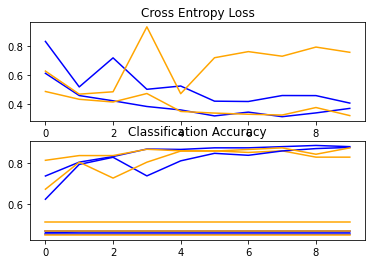

Accuracy: mean=62.603 std=18.647, n=5


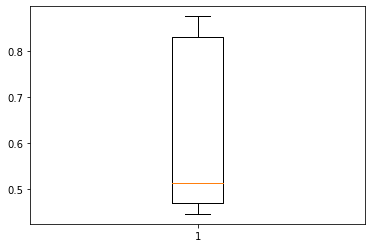

OK


In [47]:
# entry point, run the test harness
run_test_harness()
print("OK")

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Use scikit-learn to grid search the batch size and epochs
import numpy

In [70]:
import time

In [81]:
start_time = time.time()
seed = 7
numpy.random.seed(seed)
modelGrid = KerasClassifier(build_fn=define_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons1 = [256,128,64,32,16,8]
neurons2 = [256,128,64,32,16,8]
neurons3 = [256,128,64,32,16,8]
neurons4 = [256,128,64,32,16,8]
neurons5 = [256,128,64,32,16,8]
#param_grid = dict(batch_size=batch_size, epochs=epochs,learn_rate=learn_rate,momentum=momentum,init_mode=init_mode,activation=activation,dropout_rate=dropout_rate)
#param_grid = dict(activation=activation,dropout_rate=dropout_rate)
param_grid = dict(neurons1=neurons1,neurons2=neurons2,neurons3=neurons3,neurons4=neurons4,neurons5=neurons5)

grid = GridSearchCV(estimator=modelGrid, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

end_time = time.time()
end_time-start_time

Best: 0.641745 using {'neurons1': 32, 'neurons2': 32, 'neurons3': 256, 'neurons4': 8, 'neurons5': 8}
0.462617 (0.023827) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 256, 'neurons5': 256}
0.462617 (0.023827) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 256, 'neurons5': 128}
0.537383 (0.023827) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 256, 'neurons5': 64}
0.378505 (0.136557) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 256, 'neurons5': 32}
0.440810 (0.120311) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 256, 'neurons5': 16}
0.518692 (0.040198) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 256, 'neurons5': 8}
0.462617 (0.023827) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 128, 'neurons5': 256}
0.528037 (0.034339) with: {'neurons1': 256, 'neurons2': 256, 'neurons3': 256, 'neurons4': 128, 'neurons5': 128}
0.462617

0.518692 (0.040198) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 128, 'neurons5': 32}
0.537383 (0.023827) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 128, 'neurons5': 16}
0.529595 (0.034409) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 128, 'neurons5': 8}
0.570093 (0.132390) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 64, 'neurons5': 256}
0.509346 (0.043335) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 64, 'neurons5': 128}
0.445483 (0.106581) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 64, 'neurons5': 64}
0.518692 (0.040198) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 64, 'neurons5': 32}
0.537383 (0.023827) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 64, 'neurons5': 16}
0.528037 (0.034339) with: {'neurons1': 64, 'neurons2': 64, 'neurons3': 128, 'neurons4': 64, 'neurons5': 8}
0.528037 (0.034339) with:

0.509346 (0.043335) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 64, 'neurons5': 8}
0.509346 (0.043335) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 32, 'neurons5': 256}
0.471963 (0.034339) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 32, 'neurons5': 128}
0.509346 (0.043335) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 32, 'neurons5': 64}
0.462617 (0.023827) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 32, 'neurons5': 32}
0.518692 (0.040198) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 32, 'neurons5': 16}
0.582555 (0.160126) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 32, 'neurons5': 8}
0.417445 (0.087200) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 16, 'neurons5': 256}
0.528037 (0.034339) with: {'neurons1': 16, 'neurons2': 32, 'neurons3': 64, 'neurons4': 16, 'neurons5': 128}
0.409657 (0.114737) with: {'neurons

5830.489287137985